<div>
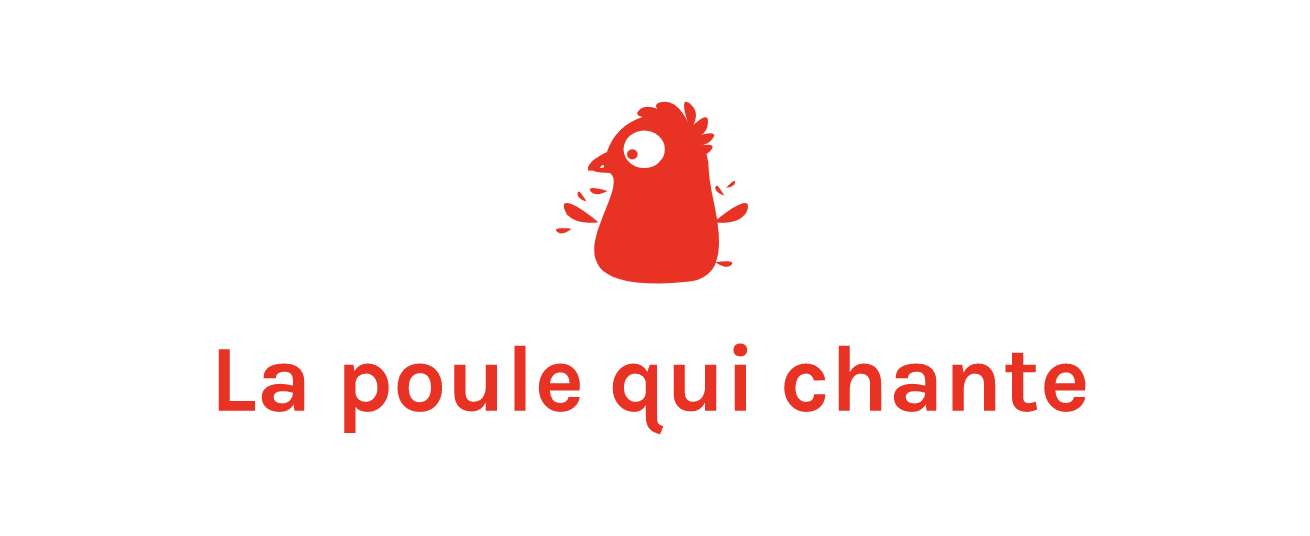
</div>

<h1><center>Projet 9: Produisez une étude de marché avec Python</center></h1>

### Sommaire

* [Nettoyage des données](#chapter1)
* [Traitement des valeurs manquantes du fichier dispo](#chapter2)
* [Jointures](#chapter3)
* [Variable ratio_pro_volaille](#chapter4)
* [Valeurs manquantes](#chapter5)
* [Enregistrement de la dataframe finale](#chapter6)


## Nettoyage des données<a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd

In [2]:
# Ce fichier comprend le taux de stabilité politique et le PIB par habitant de chaque pays.
stabilite = pd.read_excel('pib_stab.xlsx')

In [3]:
# Ce fichier indique la distance des pays par rapport à la France
distance = pd.read_excel('distance.xlsx')

In [4]:
# Ce fichier indique la population par pays entre 2000 et 2017
pop = pd.read_csv('Population_2000_2018.csv')

In [5]:
# Ce fichier indique la disponibilité alimentaire de chaque pays par élément
dispo = pd.read_csv('DisponibiliteAlimentaire_2017.csv')

In [6]:
stabilite.head()

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur
0,Données de la sécurité alimentaire,Afghanistan,Valeur,PIB par habitant,2017,I$,2058.40
1,Données de la sécurité alimentaire,Afghanistan,Valeur,Stabilité politique,2017,indice,-2.80
2,Données de la sécurité alimentaire,Afrique du Sud,Valeur,PIB par habitant,2017,I$,12701.30
3,Données de la sécurité alimentaire,Afrique du Sud,Valeur,Stabilité politique,2017,indice,-0.28
4,Données de la sécurité alimentaire,Albanie,Valeur,PIB par habitant,2017,I$,12771.00


In [7]:
# Je retire les colonnes qui ne me serviront pas
stabilite = stabilite[['Zone','Produit','Valeur']]

In [8]:
stabilite_pivot = pd.pivot(stabilite, index=['Zone'], columns=['Produit'],values=['Valeur'])

In [9]:
stabilite_pivot.columns = stabilite_pivot.columns.droplevel()

In [10]:
stabilite_pivot.head()

Produit,PIB par habitant,Stabilité politique
Zone,,
Afghanistan,2058.4,-2.80
Afrique du Sud,12701.3,-0.28
Albanie,12771.0,0.38
Algérie,11737.4,-0.92
Allemagne,52952.9,0.59


In [11]:
distance = distance[['Zone','distance(km)']]

In [12]:
# Aperçu du fichier distance
distance.head()

,Zone,distance(km)
0,Afghanistan,5590.381
1,Afrique du Sud,8692.812
2,Albanie,1603.534
3,Algérie,1340.390
4,Allemagne,880.187


In [13]:
# Aperçu du fichier pop
pop.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


Mes autres dataframes ne contiennent que des valeurs calculées sur l'année 2017, je décide de ne conserver que les valeurs de l'année 2017 pour ma dataframe pop.

In [14]:
pop = pop.loc[pop['Année']==2017,:]

In [15]:
pop = pop[['Zone','Valeur']]

In [16]:
pop.head()

,Zone,Valeur
17,Afghanistan,36296.113
36,Afrique du Sud,57009.756
55,Albanie,2884.169
74,Algérie,41389.189
93,Allemagne,82658.409


In [17]:
pop = pop.rename(columns={'Valeur':'Population'})

In [18]:
pop.head()

,Zone,Population
17,Afghanistan,36296.113
36,Afrique du Sud,57009.756
55,Albanie,2884.169
74,Algérie,41389.189
93,Allemagne,82658.409


In [19]:
# Aperçu de dispo
dispo.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [20]:
# Je calcule la moyenne de valeur nan dans chaque colonne
dispo.isna().mean()

Code Domaine              0.0
Domaine                   0.0
Code zone                 0.0
Zone                      0.0
Code Élément              0.0
Élément                   0.0
Code Produit              0.0
Produit                   0.0
Code année                0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
dtype: float64

In [21]:
dispo = dispo[['Zone','Élément', 'Produit', 'Valeur']]

In [22]:
liste = ('Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)')

In [23]:
# Je ne conserve que les éléments qui me seront utiles par la suite
dispo = dispo.loc[dispo['Élément'].isin(liste),:]

In [24]:
dispo.head()

,Zone,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281.0
1,Afghanistan,Importations - Quantité,Blé et produits,2302.0
2,Afghanistan,Variation de stock,Blé et produits,-119.0
3,Afghanistan,Exportations - Quantité,Blé et produits,0.0
4,Afghanistan,Disponibilité intérieure,Blé et produits,6701.0


In [25]:
# Je liste l'ensemble des produits
dispo['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

La colonne 'produit' comprend beaucoup d'éléments. Je décide de ne conserver que les données sur la 'viande de volailles'.

In [26]:
dispo = dispo.loc[dispo['Produit']=='Viande de Volailles',:]

In [27]:
dispo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1647 entries, 651 to 176399
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Zone     1647 non-null   object 
 1   Élément  1647 non-null   object 
 2   Produit  1647 non-null   object 
 3   Valeur   1647 non-null   float64
dtypes: float64(1), object(3)
memory usage: 64.3+ KB


In [28]:
dispo.head()

,Zone,Élément,Produit,Valeur
651,Afghanistan,Production,Viande de Volailles,28.0
652,Afghanistan,Importations - Quantité,Viande de Volailles,29.0
653,Afghanistan,Variation de stock,Viande de Volailles,0.0
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,57.0
655,Afghanistan,Pertes,Viande de Volailles,2.0


In [29]:
dispo_pivot = pd.pivot(dispo, index=['Zone'], columns=['Élément'],values=['Valeur'])

In [30]:
dispo_pivot.head()

Valeur                                        \
Élément        Aliments pour animaux Autres utilisations (non alimentaire)   
Zone                                                                         
Afghanistan                      NaN                                   NaN   
Afrique du Sud                   NaN                                   NaN   
Albanie                          NaN                                   NaN   
Algérie                          NaN                                   NaN   
Allemagne                        NaN                                   NaN   

                                                               \
Élément        Disponibilité alimentaire (Kcal/personne/jour)   
Zone                                                            
Afghanistan                                               5.0   
Afrique du Sud                                          143.0   
Albanie                                                  85.0   
Algérie                                                  22.0   
Allemagne                                                71.0   

                                                                       \
Élément        Disponibilité alimentaire en quantité (kg/personne/an)   
Zone                                                                    
Afghanistan                                                  1.53       
Afrique du Sud                                              35.69       
Albanie                                                     16.36       
Algérie                                                      6.38       
Allemagne                                                   19.47       

                                                                         \
Élément        Disponibilité de protéines en quantité (g/personne/jour)   
Zone                                                                      
Afghanistan                                                  0.54         
Afrique du Sud                                              14.11         
Albanie                                                      6.26         
Algérie                                                      1.97         
Allemagne                                                    7.96         

                                                                 \
Élément        Disponibilité intérieure Exportations - Quantité   
Zone                                                              
Afghanistan                        57.0                     NaN   
Afrique du Sud                   2118.0                    63.0   
Albanie                            47.0                     0.0   
Algérie                           277.0                     0.0   
Allemagne                        1739.0                   646.0   

                                                                              \
Élément        Importations - Quantité Nourriture Pertes Production Semences   
Zone                                                                           
Afghanistan                       29.0       55.0    2.0       28.0      NaN   
Afrique du Sud                   514.0     2035.0   83.0     1667.0      NaN   
Albanie                           38.0       47.0    NaN       13.0      NaN   
Algérie                            2.0      264.0   13.0      275.0      NaN   
Allemagne                        842.0     1609.0    NaN     1514.0      NaN   

                                              
Élément        Traitement Variation de stock  
Zone                                          
Afghanistan           NaN                0.0  
Afrique du Sud        NaN               -0.0  
Albanie               NaN                4.0  
Algérie               NaN                0.0  
Allemagne           167.0              -29.0

## Traitement des valeurs manquantes du fichier dispo<a class="anchor" id="chapter2"></a>


In [31]:
# Affichage du nombre de valeurs manquantes par colonne
dispo_pivot.isna().sum()

        Élément                                                 
Valeur  Aliments pour animaux                                       171
        Autres utilisations (non alimentaire)                       138
        Disponibilité alimentaire (Kcal/personne/jour)                0
        Disponibilité alimentaire en quantité (kg/personne/an)        0
        Disponibilité de protéines en quantité (g/personne/jour)      0
        Disponibilité intérieure                                      2
        Exportations - Quantité                                      37
        Importations - Quantité                                       2
        Nourriture                                                    2
        Pertes                                                      105
        Production                                                    4
        Semences                                                    171
        Traitement                                                  126

Les colonnes :  
* **Aliments pour animaux**
* **Autres utilisations (non alimentaire)**
* **Pertes**
* **Semences**
* **Traitement**  
contiennent beaucoup de valeurs manquantes car elles ne s'appliquent pas à la viande de volailles.  
Je décide de les supprimer.

In [32]:
dispo_pivot.columns = dispo_pivot.columns.droplevel()

In [33]:
dispo_pivot.columns

Index(['Aliments pour animaux', 'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'],
      dtype='object', name='Élément')

In [34]:
 dispo_pivot = dispo_pivot.drop(['Aliments pour animaux','Autres utilisations (non alimentaire)','Semences','Traitement','Pertes'], axis=1)

In [35]:
dispo_pivot.isna().sum()

Élément
Disponibilité alimentaire (Kcal/personne/jour)               0
Disponibilité alimentaire en quantité (kg/personne/an)       0
Disponibilité de protéines en quantité (g/personne/jour)     0
Disponibilité intérieure                                     2
Exportations - Quantité                                     37
Importations - Quantité                                      2
Nourriture                                                   2
Production                                                   4
Variation de stock                                           3
dtype: int64

Je vais remplacer les valeurs manquantes de la colonne 'Exportations' en utilisant cette formule:  

**Disponibilité Intérieure = (Production + Importations - disponibilité alimentaire(Quantité) + Variation de stock) - Exportations**  
devient alors:  
**Exportations = (Production + Importations - disponibilité alimentaire(Quantité) + Variation de stock) - Disponibilité Intérieure**

In [36]:
dispo_pivot['Exportations - Quantité']= dispo_pivot.apply(lambda x : ((x['Production'] + x['Importations - Quantité'] 
                                                                       - x['Disponibilité alimentaire en quantité (kg/personne/an)'] 
                                                                       + x['Variation de stock']) - x['Disponibilité intérieure']) 
                                                          if pd.isnull(x['Exportations - Quantité']) else x['Exportations - Quantité'], axis=1)

In [37]:
dispo_pivot.isna().sum()

Élément
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité alimentaire en quantité (kg/personne/an)      0
Disponibilité de protéines en quantité (g/personne/jour)    0
Disponibilité intérieure                                    2
Exportations - Quantité                                     4
Importations - Quantité                                     2
Nourriture                                                  2
Production                                                  4
Variation de stock                                          3
dtype: int64

Cette formule m'a permis de remplacer 33 valeurs manquantes.

## Jointures <a class="anchor" id="chapter3"></a>

In [38]:
# Je commence par joindre mes df dispo et stabilité en 'outer' afin de garder tous les pays.
dispo_stab = pd.merge(dispo_pivot,stabilite_pivot, on ='Zone', how= 'outer')

In [39]:
dispo_stab.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,PIB par habitant,Stabilité politique
Zone,,,,,,,,,,,
Afghanistan,5.0,1.53,0.54,57.0,-1.53,29.0,55.0,28.0,0.0,2058.4,-2.80
Afrique du Sud,143.0,35.69,14.11,2118.0,63.00,514.0,2035.0,1667.0,-0.0,12701.3,-0.28
Albanie,85.0,16.36,6.26,47.0,0.00,38.0,47.0,13.0,4.0,12771.0,0.38
Algérie,22.0,6.38,1.97,277.0,0.00,2.0,264.0,275.0,0.0,11737.4,-0.92
Allemagne,71.0,19.47,7.96,1739.0,646.00,842.0,1609.0,1514.0,-29.0,52952.9,0.59


In [40]:
# Je joins ma df avec le fichier pop en conservant encore l'ensemble de mes données.
dispo_stab_pop = pd.merge(dispo_stab,pop, on = 'Zone', how= 'outer')

In [41]:
dispo_stab_pop.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,PIB par habitant,Stabilité politique,Population
0,Afghanistan,5.0,1.53,0.54,57.0,-1.53,29.0,55.0,28.0,0.0,2058.4,-2.80,36296.113
1,Afrique du Sud,143.0,35.69,14.11,2118.0,63.00,514.0,2035.0,1667.0,-0.0,12701.3,-0.28,57009.756
2,Albanie,85.0,16.36,6.26,47.0,0.00,38.0,47.0,13.0,4.0,12771.0,0.38,2884.169
3,Algérie,22.0,6.38,1.97,277.0,0.00,2.0,264.0,275.0,0.0,11737.4,-0.92,41389.189
4,Allemagne,71.0,19.47,7.96,1739.0,646.00,842.0,1609.0,1514.0,-29.0,52952.9,0.59,82658.409


In [42]:
# Jointure de ma df avec le fichier distance 
dispo_stab_pop_dist = pd.merge(dispo_stab_pop,distance, on = 'Zone', how= 'left')

In [43]:
dispo_stab_pop_dist.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,PIB par habitant,Stabilité politique,Population,distance(km)
0,Afghanistan,5.0,1.53,0.54,57.0,-1.53,29.0,55.0,28.0,0.0,2058.4,-2.80,36296.113,5590.381
1,Afrique du Sud,143.0,35.69,14.11,2118.0,63.00,514.0,2035.0,1667.0,-0.0,12701.3,-0.28,57009.756,8692.812
2,Albanie,85.0,16.36,6.26,47.0,0.00,38.0,47.0,13.0,4.0,12771.0,0.38,2884.169,1603.534
3,Algérie,22.0,6.38,1.97,277.0,0.00,2.0,264.0,275.0,0.0,11737.4,-0.92,41389.189,1340.390
4,Allemagne,71.0,19.47,7.96,1739.0,646.00,842.0,1609.0,1514.0,-29.0,52952.9,0.59,82658.409,880.187


In [44]:
dispo_stab_pop_dist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 14 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      236 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)            172 non-null    float64
 2   Disponibilité alimentaire en quantité (kg/personne/an)    172 non-null    float64
 3   Disponibilité de protéines en quantité (g/personne/jour)  172 non-null    float64
 4   Disponibilité intérieure                                  170 non-null    float64
 5   Exportations - Quantité                                   168 non-null    float64
 6   Importations - Quantité                                   170 non-null    float64
 7   Nourriture                                                170 non-null    float64
 8   Production          

In [45]:
# Je retire les colonnes qui ne me serviront pas.
dispo_stab_pop_dist = dispo_stab_pop_dist[['Zone',
                                           'Disponibilité alimentaire en quantité (kg/personne/an)',
        'Disponibilité de protéines en quantité (g/personne/jour)',
                    'Disponibilité intérieure',
                                'Exportations - Quantité',
                                'Importations - Quantité',
                                 'PIB par habitant',
             'Stabilité politique',
                                  'Population',
                                'distance(km)']]

In [46]:
dispo_stab_pop_dist.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km)
0,Afghanistan,1.53,0.54,57.0,-1.53,29.0,2058.4,-2.80,36296.113,5590.381
1,Afrique du Sud,35.69,14.11,2118.0,63.00,514.0,12701.3,-0.28,57009.756,8692.812
2,Albanie,16.36,6.26,47.0,0.00,38.0,12771.0,0.38,2884.169,1603.534
3,Algérie,6.38,1.97,277.0,0.00,2.0,11737.4,-0.92,41389.189,1340.390
4,Allemagne,19.47,7.96,1739.0,646.00,842.0,52952.9,0.59,82658.409,880.187


## Variable ratio_pro_volaille<a class="anchor" id="chapter4"></a>

Je vais à présent créer une nouvelle colonne afin de calculer la proportion de protéine animale par rapport à la consommation totale de protéine. Cela me permettra de distinguer les pays qui consomment de la viande des pays végétariens.

In [47]:
dispo2 = pd.read_csv('DisponibiliteAlimentaire_2017.csv')

In [48]:
# Je ne conserve que les données de la disponibilité de protéines en quantité pour l'ensemble des produits
dispo2= dispo2.loc[dispo2['Élément']=='Disponibilité de protéines en quantité (g/personne/jour)',:]

In [49]:
dispo2.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
12,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2511,Blé et produits,2017,2017,g/personne/jour,35.88,Fc,Donnée calculée
25,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2805,Riz et produits,2017,2017,g/personne/jour,2.58,Fc,Donnée calculée
39,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2513,Orge et produits,2017,2017,g/personne/jour,0.14,Fc,Donnée calculée
53,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2514,Maïs et produits,2017,2017,g/personne/jour,0.27,Fc,Donnée calculée
78,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2517,Millet et produits,2017,2017,g/personne/jour,0.05,Fc,Donnée calculée


In [50]:
dispo2=dispo2[['Zone','Élément','Produit','Valeur']]

In [51]:
dispo2.head()

,Zone,Élément,Produit,Valeur
12,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Blé et produits,35.88
25,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Riz et produits,2.58
39,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Orge et produits,0.14
53,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Maïs et produits,0.27
78,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Millet et produits,0.05


In [52]:
# Je calcule la moyenne de la disponibilité de protéines par pays
dispo2 = dispo2.groupby(['Zone'])['Valeur'].mean()

In [53]:
dispo2.head()

Zone
Afghanistan       0.858571
Afrique du Sud    0.958161
Albanie           1.532051
Algérie           1.105357
Allemagne         1.196207
Name: Valeur, dtype: float64

In [54]:
df_final = pd.merge(dispo_stab_pop_dist,dispo2, on='Zone', how= 'left')

In [55]:
df_final.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),Valeur
0,Afghanistan,1.53,0.54,57.0,-1.53,29.0,2058.4,-2.80,36296.113,5590.381,0.858571
1,Afrique du Sud,35.69,14.11,2118.0,63.00,514.0,12701.3,-0.28,57009.756,8692.812,0.958161
2,Albanie,16.36,6.26,47.0,0.00,38.0,12771.0,0.38,2884.169,1603.534,1.532051
3,Algérie,6.38,1.97,277.0,0.00,2.0,11737.4,-0.92,41389.189,1340.390,1.105357
4,Allemagne,19.47,7.96,1739.0,646.00,842.0,52952.9,0.59,82658.409,880.187,1.196207


In [56]:
df_final.set_index('Zone',inplace = True)

In [57]:
df_final.columns

Index(['Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'PIB par habitant', 'Stabilité politique',
       'Population', 'distance(km)', 'Valeur'],
      dtype='object')

In [58]:
df_final = df_final.rename(columns={'Valeur': 'Proteines totales'})

In [71]:
df_final.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
Zone,,,,,,,,,,
Afghanistan,1.53,0.54,57.0,-1.53,29.0,2058.4,-2.80,36296.113,5590.381,0.628952
Afrique du Sud,35.69,14.11,2118.0,63.00,514.0,12701.3,-0.28,57009.756,8692.812,14.726128
Albanie,16.36,6.26,47.0,0.00,38.0,12771.0,0.38,2884.169,1603.534,4.086025
Algérie,6.38,1.97,277.0,0.00,2.0,11737.4,-0.92,41389.189,1340.390,1.782229
Allemagne,19.47,7.96,1739.0,646.00,842.0,52952.9,0.59,82658.409,880.187,6.654367


In [60]:
# Je crée ma variable ratio_pro_volailles
df_final['ratio_pro_volailles'] = df_final['Disponibilité de protéines en quantité (g/personne/jour)']/ df_final['Proteines totales']

In [61]:
df_final = df_final.drop(['Proteines totales'], axis=1)

In [62]:
df_final.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
Zone,,,,,,,,,,
Afghanistan,1.53,0.54,57.0,-1.53,29.0,2058.4,-2.80,36296.113,5590.381,0.628952
Afrique du Sud,35.69,14.11,2118.0,63.00,514.0,12701.3,-0.28,57009.756,8692.812,14.726128
Albanie,16.36,6.26,47.0,0.00,38.0,12771.0,0.38,2884.169,1603.534,4.086025
Algérie,6.38,1.97,277.0,0.00,2.0,11737.4,-0.92,41389.189,1340.390,1.782229
Allemagne,19.47,7.96,1739.0,646.00,842.0,52952.9,0.59,82658.409,880.187,6.654367


In [63]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, Afghanistan to Tokélaou
Data columns (total 10 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Disponibilité alimentaire en quantité (kg/personne/an)    172 non-null    float64
 1   Disponibilité de protéines en quantité (g/personne/jour)  172 non-null    float64
 2   Disponibilité intérieure                                  170 non-null    float64
 3   Exportations - Quantité                                   168 non-null    float64
 4   Importations - Quantité                                   170 non-null    float64
 5   PIB par habitant                                          186 non-null    float64
 6   Stabilité politique                                       197 non-null    float64
 7   Population                                                236 non-null    float64
 8   distance(k

## Valeurs manquantes <a class="anchor" id="chapter5"></a>

Ma dataframe comprend encore des pays dont il manque des données. Je décide de les enregistrer sur une nouvelle dataframe afin de les requalifier par la suite.

In [64]:
index_with_nan = df_final[df_final.isnull().any(axis=1)]

In [65]:
index_with_nan.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
Zone,,,,,,,,,,
"Chine, Taiwan Province de",33.17,11.01,785.0,8.00,161.0,NaN,0.86,23674.546,9834.232,11.175709
"Chine, continentale",12.33,3.96,18161.0,576.00,452.0,NaN,NaN,1421021.791,8225.232,3.474369
Cuba,23.72,7.12,342.0,-25.72,312.0,NaN,0.65,11339.254,7729.485,6.685068
Djibouti,2.68,0.92,3.0,NaN,3.0,4885.2,-0.74,944.099,5595.459,1.163330
Maldives,13.50,4.70,12.0,NaN,12.0,18058.6,0.23,496.402,8294.178,4.894034


In [66]:
index_with_nan.to_csv('index_with_nan.csv')  

## Enregistrement de la dataframe finale<a class="anchor" id="chapter6"></a>

In [67]:
df_final.dropna(inplace = True )

In [68]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, Afghanistan to Îles Salomon
Data columns (total 10 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Disponibilité alimentaire en quantité (kg/personne/an)    159 non-null    float64
 1   Disponibilité de protéines en quantité (g/personne/jour)  159 non-null    float64
 2   Disponibilité intérieure                                  159 non-null    float64
 3   Exportations - Quantité                                   159 non-null    float64
 4   Importations - Quantité                                   159 non-null    float64
 5   PIB par habitant                                          159 non-null    float64
 6   Stabilité politique                                       159 non-null    float64
 7   Population                                                159 non-null    float64
 8   distan

In [69]:
df_final.describe()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,1.590000e+02,159.000000,159.000000
mean,20.451132,7.222767,607.276730,107.169371,88.937107,20536.174843,-0.046289,3.635436e+04,5841.983674,7.091980
std,15.976030,5.647521,1777.455741,474.606881,189.252650,20970.812810,0.886253,1.149683e+05,3863.668704,5.170754
min,0.130000,0.040000,2.000000,-70.310000,0.000000,912.800000,-2.800000,5.204500e+01,50.000000,0.054235
25%,6.420000,2.100000,32.000000,0.000000,3.000000,4785.350000,-0.625000,2.902508e+03,2364.519500,2.813673
50%,18.270000,6.650000,102.000000,1.000000,16.000000,12771.000000,0.000000,9.729823e+03,5432.882000,6.230609
75%,30.125000,10.390000,364.500000,18.500000,80.500000,29271.250000,0.670000,3.127447e+04,8681.958000,9.938301
max,72.310000,27.870000,18266.000000,4223.000000,1069.000000,126184.000000,1.590000,1.338677e+06,19263.880000,23.363239


In [70]:
df_final.to_csv('df_final.csv')  